In [1]:
from glob import glob
from os.path import join as pjoin

import gym
import textworld.gym
from textworld import EnvInfos

GAMES_PATH = "sample_games"  # This assumes `sample_games.zip` was first unzipped.
gamefiles = glob(pjoin(GAMES_PATH, "*.ulx"))
print("Found {} games.".format(len(gamefiles)))

Found 10 games.


## Playing a game 

In [6]:
!python3.7 readme.py

Found 10 games.
/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
Walkthrough: drop yellow potato. prepare meal. eat meal

Recipe #1
---------
Gather all following ingredients and follow the directions to prepare this tasty meal.

Ingredients:
  carrot
  pork chop
  purple potato

Directions:
  chop the carrot
  fry the carrot
  slice the pork chop
  fry the pork chop
  slice the purple potato
  fry the purple potato
  prepare meal




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\ 

In [2]:
gamefile = gamefiles[9]  # Pick a game.

requested_infos = EnvInfos(description=True, inventory=True, extras=["recipe", "walkthrough"])
env_id = textworld.gym.register_games([gamefile], requested_infos)

agent = textworld.agents.HumanAgent()

env = gym.make(env_id)
obs, infos = env.reset()

# Since we asked for more infos, let's print them.
print("Walkthrough:", ". ".join(infos["extra.walkthrough"]))
print(infos["extra.recipe"])

#env.render()  # Print the initial observation.

score = 0
done = False
while not done:
    command = input('> ')
    ob, score, done, infos = env.step(command)
    env.render()
    

Walkthrough: drop yellow potato. prepare meal. eat meal
None


AttributeError: 'TextworldGymEnv' object has no attribute 'obs'

## Visualizing a `TextWorld.Game` object

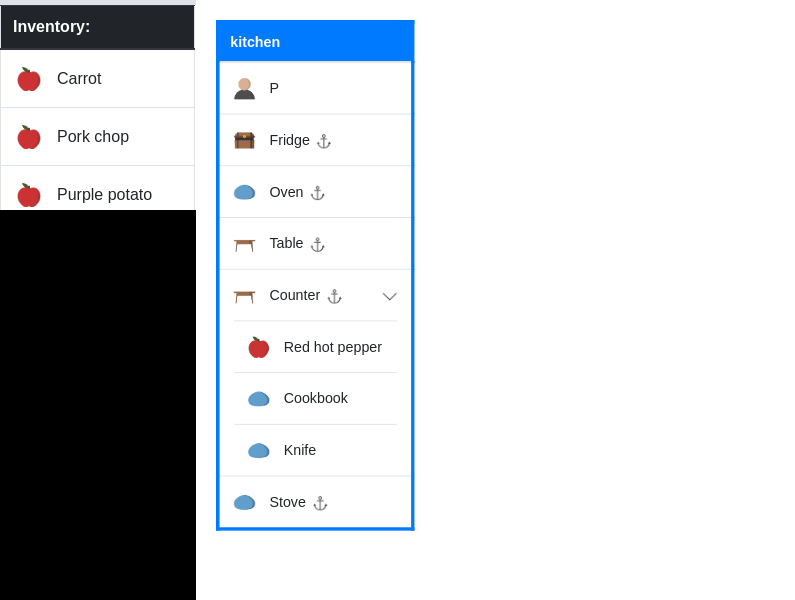

In [3]:
import textworld
gamefile = gamefiles[9]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)